In [1]:
import starsim as ss

Starsim 2.0.0 (2024-10-01) — © 2023-2024 by IDM


In [2]:
# Define the connector
class SIR_Connector(ss.Connector):
    def step(self):
        sir = self.sim.diseases.sir
        hiv = self.sim.diseases.hiv
        uids1 = sir.infected.uids
        hiv.rel_sus[uids1] = 0

In [3]:
# Create diseases
sir = ss.SIR(init_prev=0.01, beta=0.1)
hiv = ss.HIV(init_prev=0.01, beta=0.05)

# Define the parameters
pars = dict(
    n_agents = 10_000,    # Number of agents to simulate
    networks = ss.RandomNet(n_contacts=10),
    diseases = [sir, hiv],
    label = 'No Connector',
    verbose = 0,
)

In [4]:
pars2 = pars.copy()
pars2['connectors'] = SIR_Connector() # Insert the connector
pars2['label'] = 'Connector' # Update the label

Elapsed time: 1.47 s


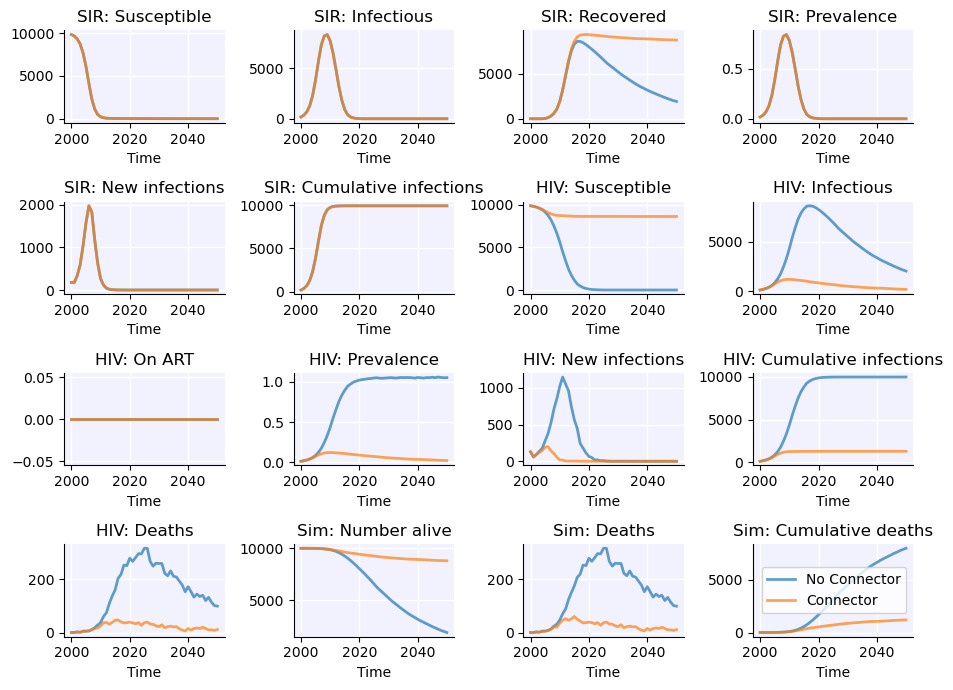

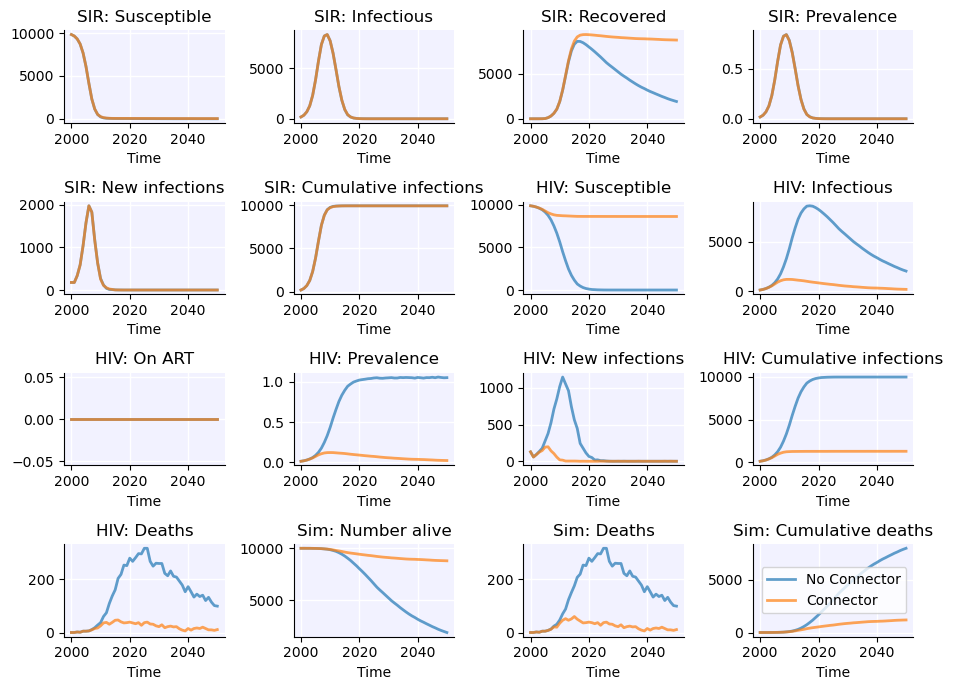

In [5]:
# Make the sim, run and plot
sim1 = ss.Sim(pars)
sim2 = ss.Sim(pars2)

# Create a MultiSim, run and plot
msim = ss.MultiSim([sim1, sim2])
msim.run()
msim.plot()